In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
data = pd.read_csv('knowledge.csv')
data.head(10)

,repetition_time,study_time,knowledge_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0.00,0.00,very_low,NaN,NaN,NaN
1,0.24,0.90,High,NaN,NaN,NaN
2,0.25,0.33,Low,NaN,NaN,NaN
3,0.65,0.30,Middle,NaN,NaN,NaN
4,0.98,0.24,Low,NaN,NaN,NaN
5,0.10,0.66,Middle,NaN,NaN,NaN
6,0.29,0.56,Middle,NaN,NaN,NaN
7,0.40,0.01,very_low,NaN,NaN,NaN
8,0.72,0.25,Low,NaN,NaN,NaN
9,0.20,0.85,High,NaN,NaN,NaN


In [11]:
data.isnull().sum()

repetition_time      0
study_time           0
knowledge_level      0
Unnamed: 3         403
Unnamed: 4         403
Unnamed: 5         403
dtype: int64

In [12]:
data = data.dropna(axis=1)
data

,repetition_time,study_time,knowledge_level
0,0.00,0.00,very_low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,Middle
4,0.98,0.24,Low
...,...,...,...
398,0.32,0.89,High
399,0.83,0.83,High
400,0.13,0.32,Low
401,0.57,0.57,Middle


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  403 non-null    float64
 1   study_time       403 non-null    float64
 2   knowledge_level  403 non-null    object 
dtypes: float64(2), object(1)
memory usage: 9.6+ KB


In [13]:
data['knowledge_level'].unique()

array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object)

In [18]:
data['knowledge_level'].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: knowledge_level, dtype: int64

In [19]:
#Splitting Data
x = data.drop(data.columns[2], axis=1)
y = data['knowledge_level']

In [20]:
#we get dummies making sure all unique values in the column has their rows and that data will be the output
y = pd.get_dummies(data, columns=['knowledge_level'])
y.head(10)

,repetition_time,study_time,knowledge_level_High,knowledge_level_Low,knowledge_level_Middle,knowledge_level_Very Low,knowledge_level_very_low
0,0.00,0.00,0,0,0,0,1
1,0.24,0.90,1,0,0,0,0
2,0.25,0.33,0,1,0,0,0
3,0.65,0.30,0,0,1,0,0
4,0.98,0.24,0,1,0,0,0
5,0.10,0.66,0,0,1,0,0
6,0.29,0.56,0,0,1,0,0
7,0.40,0.01,0,0,0,0,1
8,0.72,0.25,0,1,0,0,0
9,0.20,0.85,1,0,0,0,0


In [21]:
#splitting the data to get the training data and the testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y['knowledge_level_High'], test_size=0.25, random_state=0)

In [23]:
#Scaling the data
scaling = StandardScaler()
xtrain = scaling.fit_transform(xtrain)
xtest = scaling.fit_transform(xtest)


# GausianNB
training model using gausianNB

In [26]:
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()
nvb.fit(xtrain, ytrain)

GaussianNB()

In [28]:
#predicting 
predictions = nvb.predict(xtest)

In [29]:
confusion_matrix(ytest, predictions)

array([[77,  0],
       [ 1, 23]], dtype=int64)

In [30]:
accuracy_score(ytest, predictions)

0.9900990099009901

In [33]:
ytest.unique()

array([0, 1], dtype=uint8)

In [34]:
ytest.value_counts()

0    77
1    24
Name: knowledge_level_High, dtype: int64

In [38]:
predictions= pd.DataFrame(predictions)
predictions.value_counts()

0    78
1    23
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(close=None, block=None)>

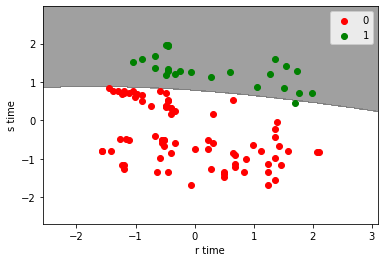

In [41]:
#visualizing the perfomance
from matplotlib.colors import ListedColormap
xset, yset = xtest,ytest
x1, x2 =np.meshgrid(np.arange(start = xset[:,0].min()-1,stop =xset[:,0].max()+1,step=0.01),
                    np.arange(start = xset[:,1].min()-1,stop =xset[:,1].max()+1,step=0.01))

plt.contourf(x1, x2, nvb.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('white','grey')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate (np.unique(yset)):
    plt.scatter(xset[yset == j,0], xset[yset == j, 1], c = ListedColormap(('red','green'))(i), label = j)

plt.xlabel('r time')
plt.ylabel('s time')
plt.legend()
plt.show